## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='outer')
# Display the data table for preview
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
df['Mouse ID'].unique().size

249

In [34]:
df.value_counts(sort=True,ascending=False)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
g989      0          45.000000           0                 Propriva      Female  21          26            2
a203      0          45.000000           0                 Infubinol     Female  20          23            1
q597      40         44.471821           2                 Ramicane      Male    20          25            1
q633      10         49.001866           0                 Zoniferol     Male    12          25            1
          5          47.183802           0                 Zoniferol     Male    12          25            1
                                                                                                          ..
i177      45         33.562402           3                 Ramicane      Male    10          18            1
          40         35.557933           2                 Ramicane      Male    10          18            1
          35         35.

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.groupby(['Mouse ID','Timepoint']).count()

duplicate.loc[duplicate['Tumor Volume (mm3)']>1]

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     0                           2                 2             2    2   
         5                           2                 2             2    2   
         10                          2                 2             2    2   
         15                          2                 2             2    2   
         20                          2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                   2           2  
         5                   2           2  
         10                  2           2  
         15                  2           2  
         20                  2           2

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

df.loc[df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].unique().size

249

In [9]:
cleaned_df.loc[df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_df = cleaned_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_df = drug_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_df.mean()
drug_df.median()
drug_df.var()
drug_df.std()
drug_df.sem()
# Assemble the resulting series into a single summary dataframe.
drug_summary = pd.DataFrame({'Mean': drug_df.mean()['Tumor Volume (mm3)'],
              'Median': drug_df.median()['Tumor Volume (mm3)'],
             'Variance': drug_df.var()['Tumor Volume (mm3)'],
             'Standard Deviation': drug_df.std()['Tumor Volume (mm3)'],
             'Standard Error of Means': drug_df.sem()['Tumor Volume (mm3)']})
drug_summary


,Mean,Median,Variance,Standard Deviation,Standard Error of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
drug_df.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_timepoints = cleaned_df[['Timepoint','Drug Regimen']].set_index('Drug Regimen')
all_mice = mice_timepoints.groupby(['Drug Regimen']).count()
all_mice



,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [18]:
all_mice.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

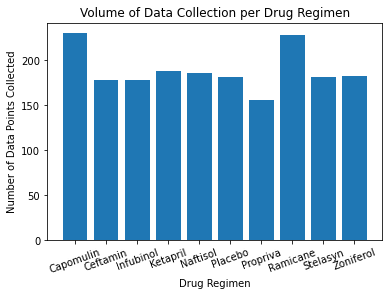

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(all_mice))
tick_locations = [row for row in x_axis]
plt.xticks(tick_locations,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation=20)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points Collected')
plt.title('Volume of Data Collection per Drug Regimen')
plt.bar(x_axis, all_mice.Timepoint)
plt.show()


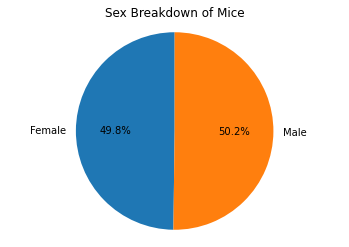

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_of_mice = cleaned_df[['Mouse ID','Sex']]
sex_of_mice = sex_of_mice.drop_duplicates('Mouse ID')
sex_of_mice = sex_of_mice.groupby(['Sex']).count()
number_of_mice = sex_of_mice['Mouse ID']
sex = ['Female','Male']

plt.pie(number_of_mice,labels=sex,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Sex Breakdown of Mice')
plt.show()

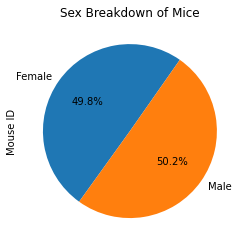

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
number_of_mice.plot(kind='pie',autopct='%1.1f%%',startangle=55)
plt.title('Sex Breakdown of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(cleaned_df.groupby('Mouse ID')['Timepoint'].max())
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(cleaned_df,max_timepoint, on=['Mouse ID'], suffixes=('','_max'))
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_max
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1883,m601,25,33.118756,1,Capomulin,Male,22,17,45
1884,m601,30,31.758275,1,Capomulin,Male,22,17,45
1885,m601,35,30.834357,1,Capomulin,Male,22,17,45
1886,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [84]:
cap_tumor_vol

9       38.982878
1675    38.753265
1685    32.377357
1695    23.343598
1705    38.939633
1715    28.484033
1725    41.483008
1735    40.728578
1739    46.539206
1749    31.023923
1759    38.125164
1769    40.658124
1779    36.041047
1789    37.311846
1799    41.581521
1809    31.896238
1819    40.159220
1829    37.074024
1839    38.846876
1842    39.952347
1852    34.455298
1862    47.685963
1872    33.329098
1877    30.485985
1887    28.430964
Name: Tumor Volume (mm3), dtype: float64

In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']=='Capomulin') & 
                (final_tumor_volume['Timepoint']==final_tumor_volume['Timepoint_max'])]['Tumor Volume (mm3)']
ram_tumor_vol =final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']=='Ramicane') & 
                (final_tumor_volume['Timepoint']==final_tumor_volume['Timepoint_max'])]['Tumor Volume (mm3)']
inf_tumor_vol =final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']=='Infubinol') & 
                (final_tumor_volume['Timepoint']==final_tumor_volume['Timepoint_max'])]['Tumor Volume (mm3)']
ceft_tumor_vol =final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']=='Ceftamin') & 
                (final_tumor_volume['Timepoint']==final_tumor_volume['Timepoint_max'])]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # Determine outliers using upper and lower bounds
# quartiles = final_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq - (1.5*iqr)

# print(f'''{lowerq}
# {upperq}
# {iqr}
# {lower_bound}
# {upper_bound}''')    

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
